# LSTM Model

In [35]:
import pandas as pd
ts = pd.read_csv("bike_sharing_dataset.csv", index_col = 0, usecols=['date','total_cust'], parse_dates=True)
ts.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='date', length=2922, freq=None)

In [36]:
ts.isnull().sum()

total_cust    4
dtype: int64

In [37]:
ts.fillna(ts.median(), inplace = True)
ts.isnull().sum()

total_cust    0
dtype: int64

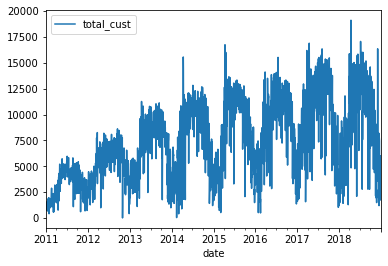

In [38]:
ts.plot()

# from statsmodels.tsa.seasonal import seasonal_decompose
# from matplotlib import pyplot as plt

# plt.figure(figsize=(16,8))
# res = seasonal_decompose(ts['total_cust'])
# res.plot();

In [39]:
print(len(ts))
ts

2922


,total_cust
date,
2011-01-01,959.0
2011-01-02,781.0
2011-01-03,1301.0
2011-01-04,1536.0
2011-01-05,1571.0
...,...
2018-12-27,5430.0
2018-12-28,2125.0
2018-12-29,6008.0


In [40]:
# preprocess data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
ts_sc = scaler.fit_transform(ts)

train = ts_sc[:2337]
val = ts_sc[2337:]

In [41]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 500
n_feats = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=1)
generator_val = TimeseriesGenerator(val, val, length=n_input, batch_size=1)

In [42]:
x, y = generator[0]
val_X, val_y = generator_val[0]

In [43]:
def LSTM(unit):
    """Creates LSTM architecture"""
    
    model = tf.keras.Sequential()
    #model.add()
    model.add(tf.keras.layers.LSTM(unit,input_shape = (n_input, n_feats), activation = 'relu',recurrent_dropout=0.3))
    
    model.add(tf.keras.layers.Dense(8, activation = 'linear'))
    model.add(tf.keras.layers.Dense(1, activation = 'linear'))
    print("created LSTM")
    
    model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(), metrics=['MSE'])
    print("compiled LSTM")
    
    return model

LSTM = LSTM(8)
LSTM.summary()

created LSTM
compiled LSTM
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 8)                 320       
                                                                 
 dense_16 (Dense)            (None, 8)                 72        
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [44]:
history = LSTM.fit(x, y, epochs=100, batch_size=16, verbose=1, validation_data=(val_X, val_y))
score = LSTM.evaluate(val_X, val_y, verbose=1)

# print performance
print()
print('Test loss:', score[0])

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.1114 - MSE: 0.1114 - val_loss: 0.5897 - val_MSE: 0.5897
Epoch 2/100
1/1 [==============================] - 0s 349ms/step - loss: 0.1004 - MSE: 0.1004 - val_loss: 0.5732 - val_MSE: 0.5732
Epoch 3/100
1/1 [==============================] - 0s 396ms/step - loss: 0.0943 - MSE: 0.0943 - val_loss: 0.5570 - val_MSE: 0.5570
Epoch 4/100
1/1 [==============================] - 0s 359ms/step - loss: 0.0904 - MSE: 0.0904 - val_loss: 0.5412 - val_MSE: 0.5412
Epoch 5/100
1/1 [==============================] - 0s 348ms/step - loss: 0.0929 - MSE: 0.0929 - val_loss: 0.5256 - val_MSE: 0.5256
Epoch 6/100
1/1 [==============================] - 0s 363ms/step - loss: 0.1000 - MSE: 0.1000 - val_loss: 0.5103 - val_MSE: 0.5103
Epoch 7/100
1/1 [==============================] - 0s 367ms/step - loss: 0.0825 - MSE: 0.0825 - val_loss: 0.4953 - val_MSE: 0.4953
Epoch 8/100
1/1 [==============================] - 0s 347ms/step - loss: 0.0698 - MSE:

Epoch 62/100
1/1 [==============================] - 0s 377ms/step - loss: 1.1744e-04 - MSE: 1.1744e-04 - val_loss: 0.1004 - val_MSE: 0.1004
Epoch 63/100
1/1 [==============================] - 0s 373ms/step - loss: 9.2707e-06 - MSE: 9.2707e-06 - val_loss: 0.1020 - val_MSE: 0.1020
Epoch 64/100
1/1 [==============================] - 0s 426ms/step - loss: 1.9854e-04 - MSE: 1.9854e-04 - val_loss: 0.1038 - val_MSE: 0.1038
Epoch 65/100
1/1 [==============================] - 0s 431ms/step - loss: 4.7905e-04 - MSE: 4.7905e-04 - val_loss: 0.1057 - val_MSE: 0.1057
Epoch 66/100
1/1 [==============================] - 0s 408ms/step - loss: 1.7106e-04 - MSE: 1.7106e-04 - val_loss: 0.1072 - val_MSE: 0.1072
Epoch 67/100
1/1 [==============================] - 0s 403ms/step - loss: 7.0801e-04 - MSE: 7.0801e-04 - val_loss: 0.1082 - val_MSE: 0.1082
Epoch 68/100
1/1 [==============================] - 0s 426ms/step - loss: 1.6286e-04 - MSE: 1.6286e-04 - val_loss: 0.1089 - val_MSE: 0.1089
Epoch 69/100
1/1 [==

In [45]:
loss_per_epoch = tf.keras.callbacks.History.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

AttributeError: type object 'History' has no attribute 'history'

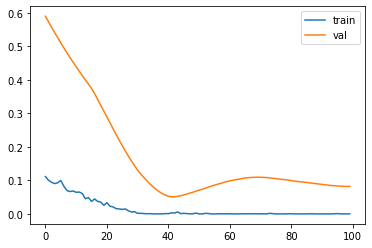

In [46]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()